In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random as rd
import scipy.stats as stats
from numpy.random import random as rand
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.DataFrame(pd.read_csv("cancerdata.csv"))
df['diagnosis'] = df['diagnosis'].replace(['B'], 0)
df['diagnosis'] = df['diagnosis'].replace(['M'], 1)
df['diagnosis'] = pd.to_numeric(df['diagnosis'])
train = df.sample(frac=0.8, random_state=25)
test = df.drop(train.index)
#test_0 = test
#test_0 = test_0.loc[test_0['diagnosis'] == 0]
#test_1 = test
#test_1 = test_1.loc[test_1['diagnosis'] == 1]

In [3]:
x1 = (train.area_mean.values-train.area_mean.values.min())/(train.area_mean.values.max()-train.area_mean.values.min())
x2 = (train.texture_mean.values-train.texture_mean.values.min())/(train.texture_mean.values.max()-train.texture_mean.values.min())
x1_test = (test.area_mean.values-test.area_mean.values.min())/(test.area_mean.values.max()-test.area_mean.values.min())
x2_test = (test.texture_mean.values-test.texture_mean.values.min())/(test.texture_mean.values.max()-test.texture_mean.values.min())

#x1_test0 = (test_0.area_mean.values-test_0.area_mean.values.min())/(test_0.area_mean.values.max()-test_0.area_mean.values.min())
#x1_test1 = (test_1.area_mean.values-test_1.area_mean.values.min())/(test_1.area_mean.values.max()-test_1.area_mean.values.min())

y = train.diagnosis.values
y_test = test.diagnosis.values
m = len(y)


X = np.array([[1]*len(x1), x1]).T
X_test =np.array([[1]*len(x1_test), x1_test]).T
#X_test0 =np.array([[1]*len(x1_test0), x1_test0]).T
#X_test1 =np.array([[1]*len(x1_test1), x1_test1]).T

print(y.shape, m)
y_test.size                          #1, area[i]

(455,) 455


114

In [4]:
np.random.seed(234)
n = 2
alpha = 0.001
contador = 1
somatorios = [0,0]
W = rand(n)

print(W[0], W[1])
while (contador < 1000000):
    
    h = 1/(1+np.exp(-(np.dot(W,X.T))))
    for j in range(0,n):
        somatorios[j] = ((h - y)*X[:,j]).sum()
    #print(somatorios[0],somatorios[1],j)
    
    for k in range(0,n):
        W[k] = W[k] - (alpha/m)*somatorios[k]

    contador += 1
print(W[0], W[1])

0.03096734347001351 0.2542820732342481
-3.729768370530047 15.342932615545674


In [5]:
from pdb import set_trace
class LogisticRegression:
    def __init__(self,alpha=0.001):
        self.alpha = alpha
    def train(self,X_train,y_train):
        set_trace()
        np.random.seed(234)
        n = X_train.shape[1]
        m = y_train.size
        contador = 1
        somatorios = [0]*n
        self.W = rand(n)
        self.X_train = X_train
        while (contador < 1000000):

            h = 1/(1+np.exp(-(np.dot(self.W,X_train.T))))
            for j in range(n):
                somatorios[j] = ((h - y_train)*X[:,j]).sum()

            for k in range(n):
                self.W[k] = self.W[k] - (self.alpha/m)*somatorios[k]
            contador += 1
    def test(self,X_test):
        y_pred = 1/(1+np.exp(-(np.dot(self.W,self.X_train.T)))) > 0.5
        return y_pred

<AxesSubplot:>

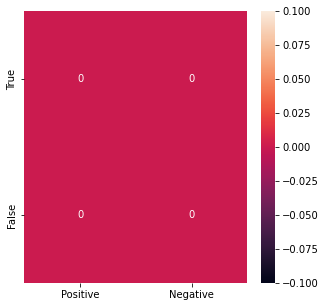

In [8]:
array = [[TP,TN],[FP,FN]]
df_cm = pd.DataFrame(array, index = [i for i in ["True","False"]],
                  columns = [i for i in ["Positive","Negative"]])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)

# Precision
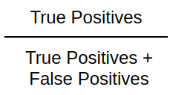

In [ ]:
Precision = TP/(TP + FP)
Precision

# Recall
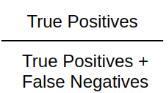

In [ ]:
Recall = TP / (TP + FN)
Recall

# Specificity
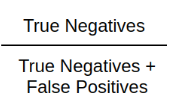

In [ ]:
Specificity = TN / (TN + FP)
Specificity

# F1-Score
F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two. Harmonic mean is just another way to calculate an “average” of values, generally described as more suitable for ratios (such as precision and recall) than the traditional arithmetic mean.
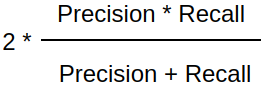

In [ ]:
F1 = 2 * ( Precision * Recall / (Precision + Recall) )
F1

# Balanced Accuracy
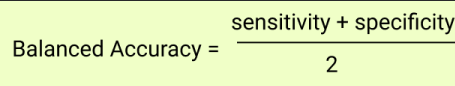

In [ ]:
BA = (Recall + Specificity) / 2
BA

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
#X = np.array([[5, 6], [7, 8], [9, 10], [11,12], [13,14], [15,16]])
#y = np.array([0, 0, 1, 1, 2, 2])

skf = StratifiedKFold(n_splits=2)
print([(i,j) for i,j in skf.split(X, y)])

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

df = pd.DataFrame(pd.read_csv("cancerdata.csv"))
df['diagnosis'] = df['diagnosis'].replace(['B'], 0)
df['diagnosis'] = df['diagnosis'].replace(['M'], 1)
df['diagnosis'] = pd.to_numeric(df['diagnosis'])
y = df['diagnosis'].to_numpy()
X = (df.area_mean.values-df.area_mean.values.min())/(df.area_mean.values.max()-df.area_mean.values.min())

X = np.array([[1]*len(X), X]).T
print(X.shape, y.size)

skf = StratifiedKFold(n_splits = 10)
#print([(i,j) for i,j in skf.split(X, y)])


(569, 2) 569


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
LR = LogisticRegression()
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index.size, "TEST:", test_index.size)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LR.train(X_train,y_train)

In [6]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)): 
    if y_pred[i] == 1 and y_test[i] == 1:
       TP += 1
    if y_pred[i] == 1 and y_test[i] == 0:
       FP += 1
    if y_pred[i] == 0 and y_test[i] == 0:
       TN += 1
    if y_pred[i] == 0 and y_test[i] == 1:
       FN += 1
print("True Positive = " ,TP,"\nFalse Positive =",FP,"\nTrue Negative = ",TN,"\nFalse Negative =", FN)

NameError: name 'y_pred' is not defined

In [ ]:
z = np.arange(0, 1, 0.0088)
z2 = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
h_test = 1/(1+np.exp(-(np.dot(W,X_test.T))))
#h_test0 = 1/(1+np.exp(-(np.dot(W,X_test0.T)))) 
#h_test1 = 1/(1+np.exp(-(np.dot(W,X_test1.T))))

plt.plot(y_test, W[1]*z+W[0], color='red', linewidth = 0, marker='X', markerfacecolor='w', markersize=10)
plt.plot(x1_test, h_test, color='blue', linewidth = 1)
plt.xlabel('Tamanho do tumor')
plt.ylabel('Probabilidade')
plt.title('Sigmoid')
#plt.plot(h, z, 'b', linewidth = 2, markerfacecolor='blue', markersize = 2)
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)

plt.show()

In [ ]:

y_pred = (h_test >= 0.5)
(y_pred == y_test).sum()/y_pred.size


In [ ]:
z = np.arange(0, 1, 0.0088)
z2 = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
h_test = 1/(1+np.exp(-(np.dot(W,X_test.T))))
plt.plot(x1_test, h_test, color='red', linewidth = 0, marker='X', markerfacecolor='w', markersize=10)
plt.xlabel('Tamanho do tumor')
plt.ylabel('Probabilidade')
plt.title('Sigmoid')
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)

plt.show()